In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import joypy
import warnings


In [19]:
def preprocessing ( file ) :
    print ( file.info ( ) )
    print(file.info())
    print ( file.duplicated ( ) . sum ( ) )
    categorical_columns =  ['Attrition','BusinessTravel','Department','EducationField','Gender']
    for col in categorical_columns:
      file[col]=file[col].astype('category')
    print(file.info())
    gend_dist = file['Gender'].value_counts()
    print(gend_dist)

    Age_name = file.Age.value_counts ( ) . index
    Age_val = file.Age.value_counts ( ) . values
    fig , ax = plt.subplots ( figsize = ( 10,10 ) )
    ax.pie ( Age_val [ : 10 ] , labels = Age_name [ : 10 ] , autopct = '%.1f%%' )
    plt.show ( )

    for i in file.select_dtypes(include='object').columns:
      print(file[i].value_counts())
      print("***" * 10)
    print(file.isnull().sum())

    for col in file.columns:
      if file[col].dtype.name == 'category':
        file[col] = file[col].cat.add_categories('Unknown').fillna('Unknown')
      else:
        file[col] = file[col].fillna(0)
    print(file.isnull().sum())

    joypy.joyplot(file, column=['Gender','Age'],by='JobRole',figsize=(9,6),xlabelsize=12,ylim='own', ylabelsize=12 ,grid='both',yrot=10,fill=True,legend=True)
    plt.show()
    return file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

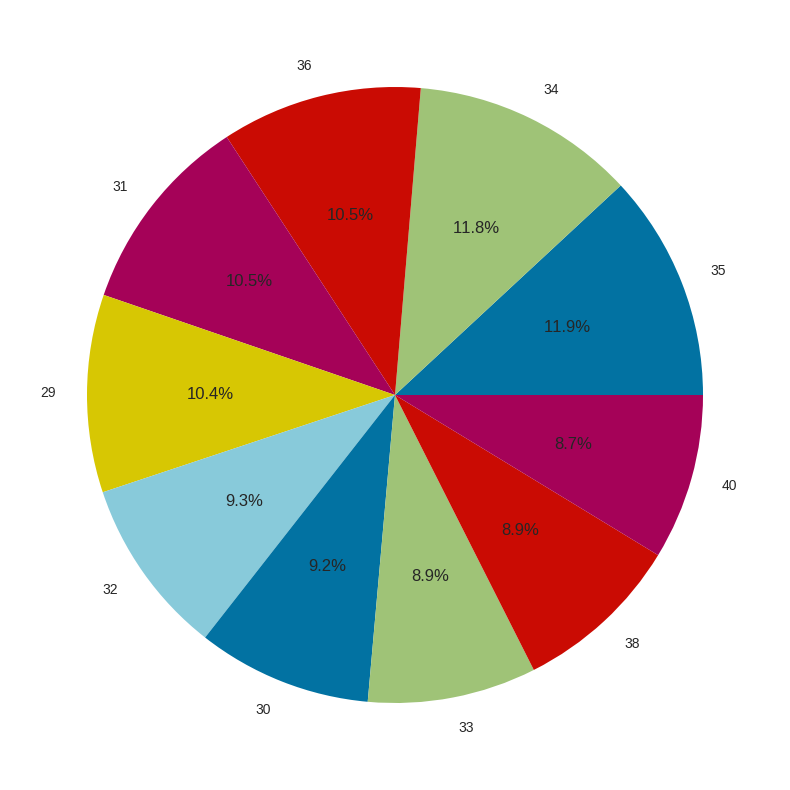

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64
******************************
MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64
******************************
Over18
Y    1470
Name: count, dtype: int64
******************************
OverTime
No     1054
Yes     416
Name: count, dtype: int64
******************************
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                   

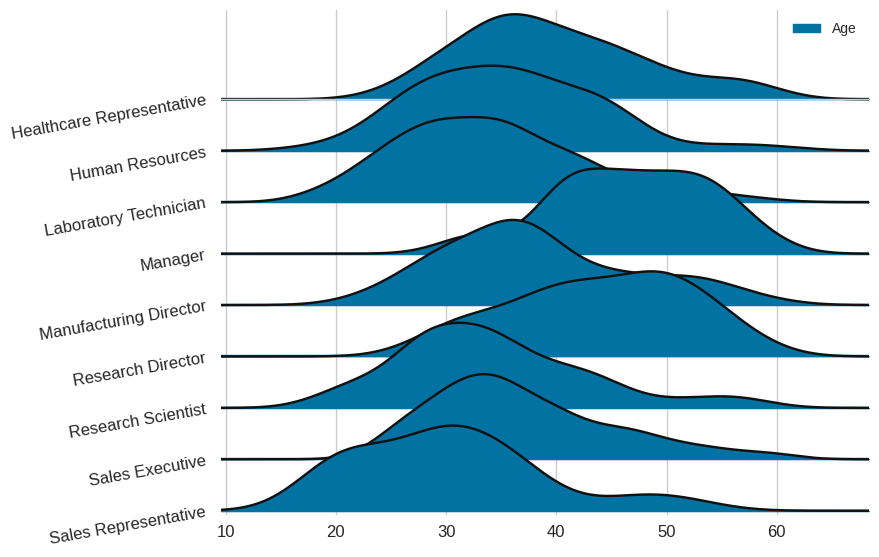

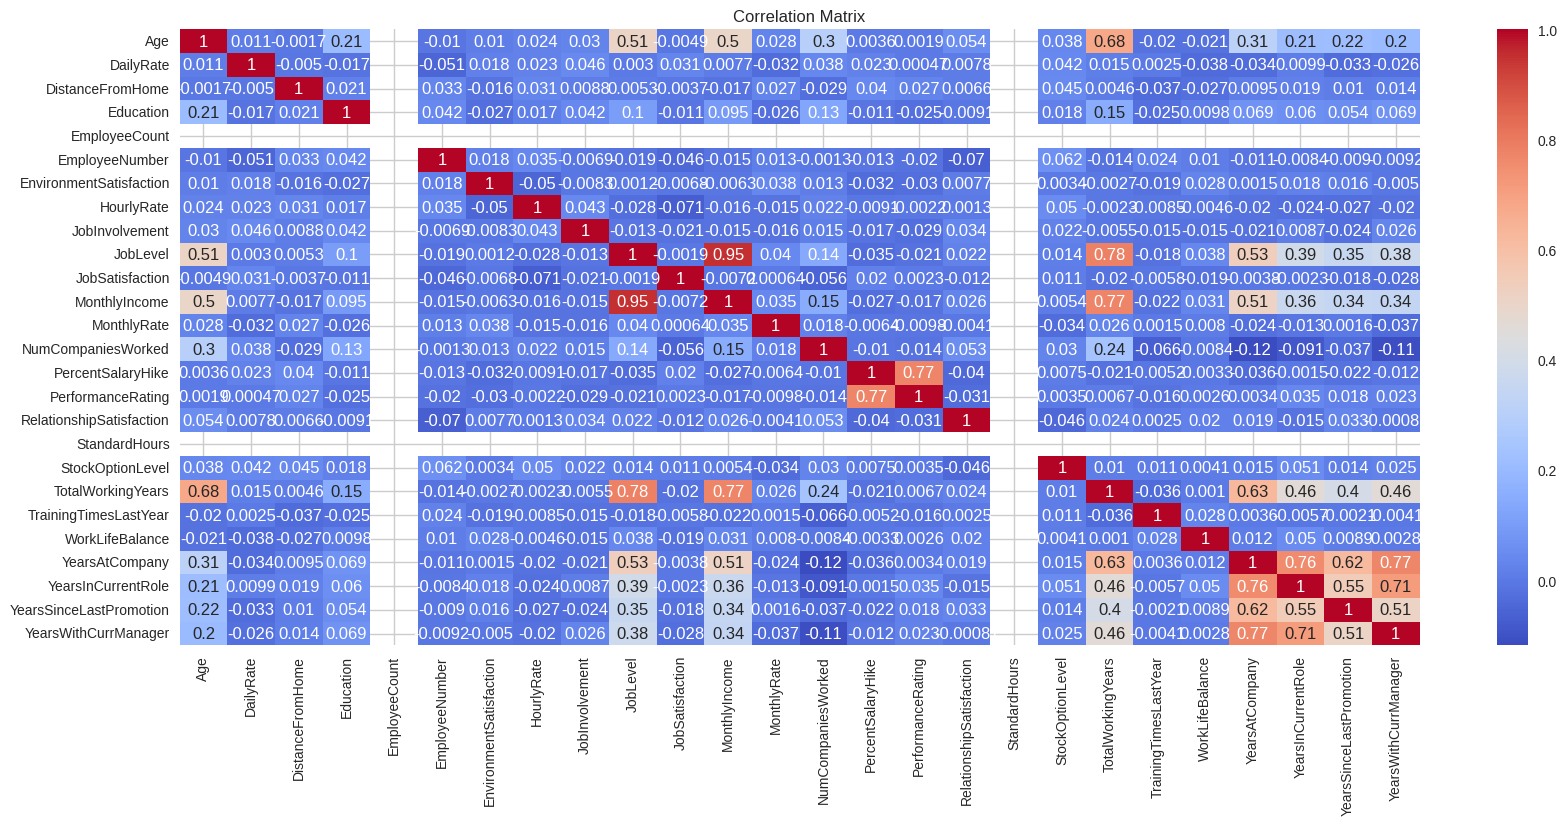

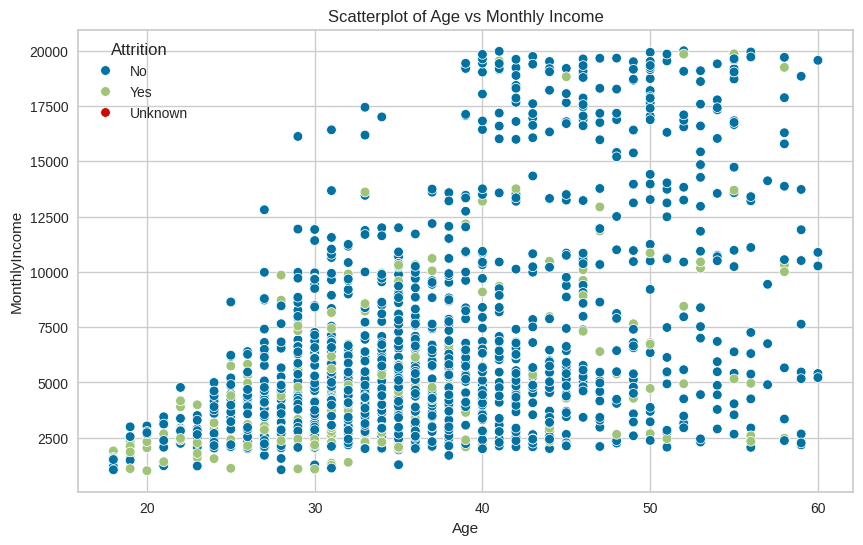

16.122448979591837
Attrition
No         1233
Yes         237
Unknown       0
Name: count, dtype: int64


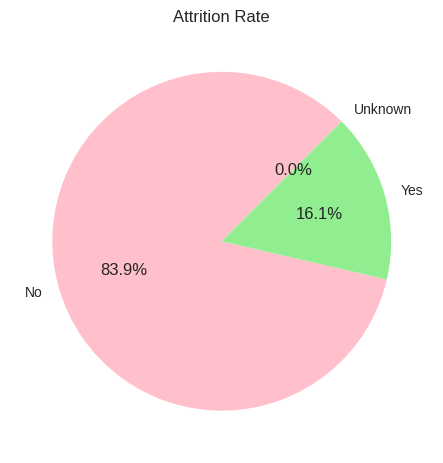

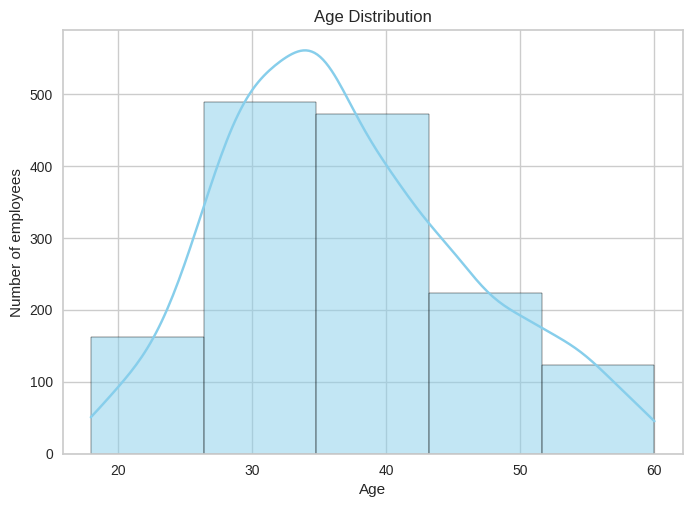

Attrition      No  Yes  Unknown
Age_category                   
Young         286  100        0
Adult         822  119        0
Senile        125   18        0


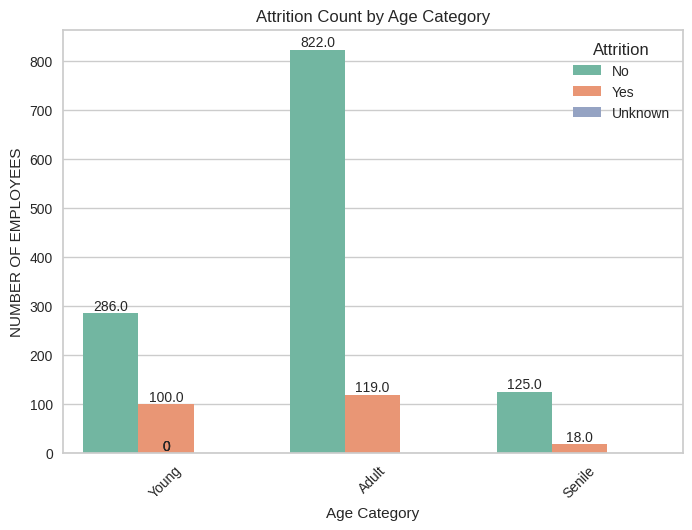

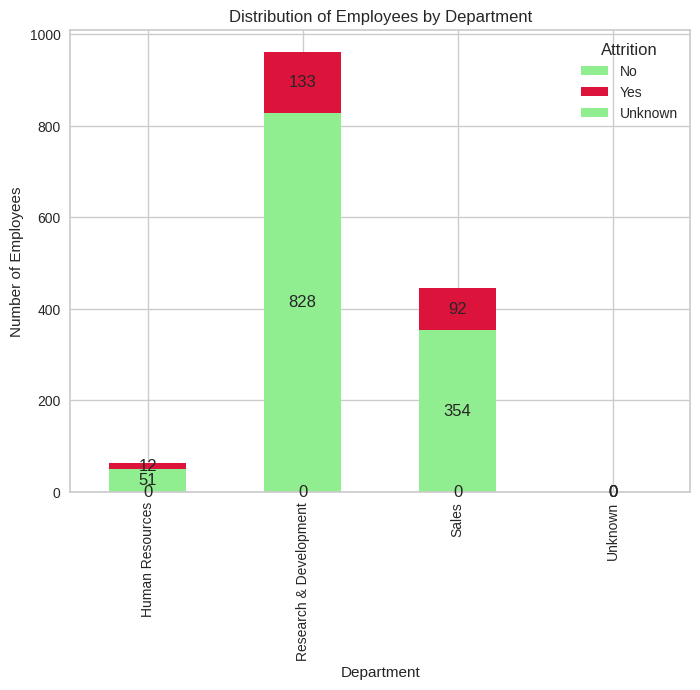

               Department  Total Employees  Attrition Count  \
0         Human Resources               63               12   
1  Research & Development              961              133   
2                   Sales              446               92   
3                 Unknown                0                0   

   Attrition Percentage  
0             19.047619  
1             13.839750  
2             20.627803  
3                   NaN  


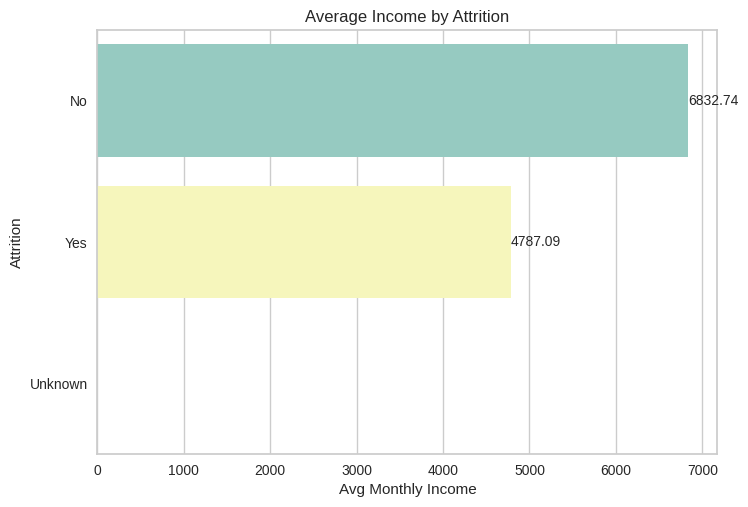

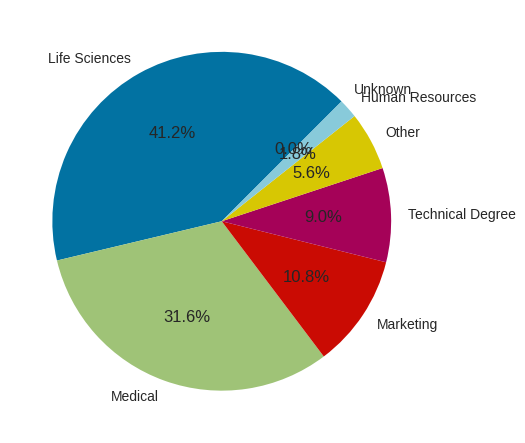

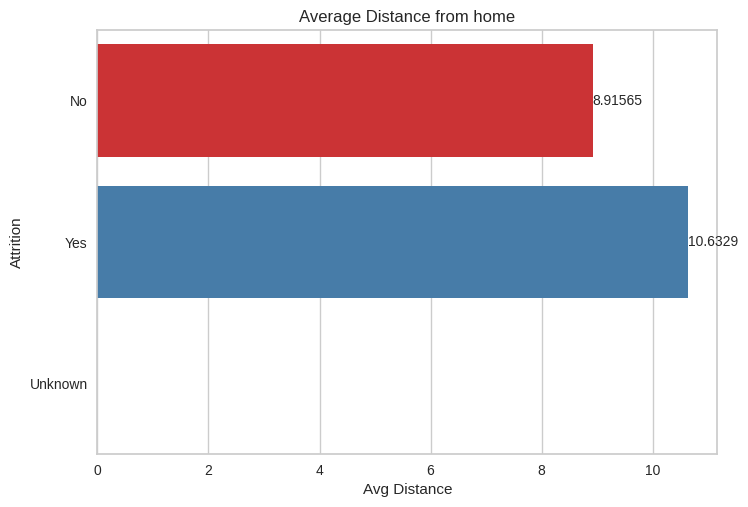

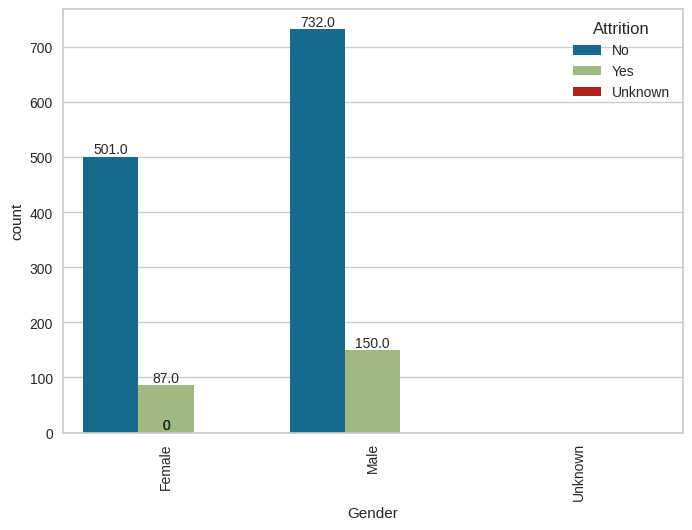

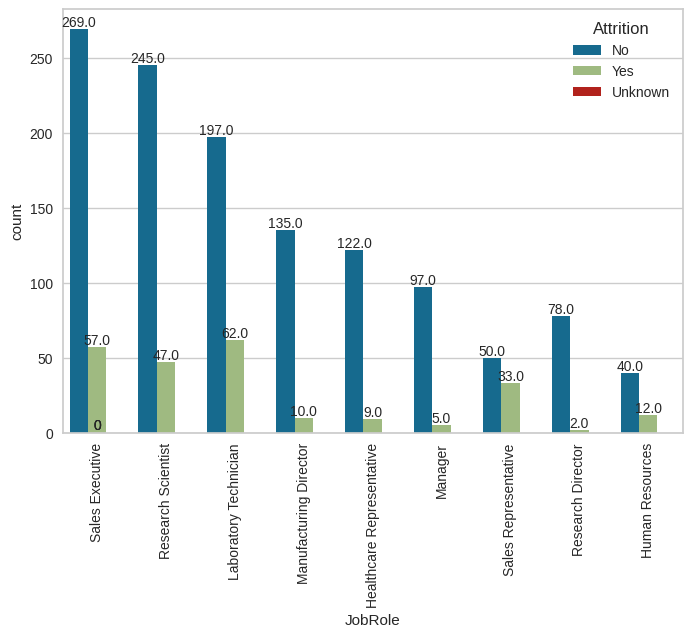

Percentage of married employees who left: 12.48%


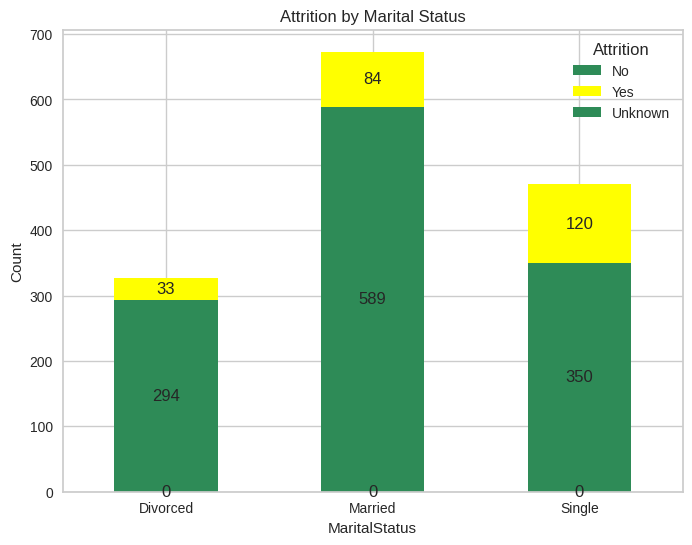

In [29]:
def analyze(df):
  correlation_matrix = df.corr(numeric_only = True)
  plt.figure(figsize=(20, 8))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
  plt.title('Correlation Matrix')
  plt.show()

  plt.figure(figsize=(10, 6))
  sns.scatterplot(x='Age',y='MonthlyIncome',data=df, hue='Attrition')
  plt.title('Scatterplot of Age vs Monthly Income')
  plt.show()

  attrition_rate = ((df[df['Attrition']=='Yes'].count()[0])/df.shape[0])*100 # Corrected filtering
  print(attrition_rate)
  attrition_count = df['Attrition'].value_counts()
  print(attrition_count)
  plt.pie(attrition_count, labels=attrition_count.index, autopct='%1.1f%%',startangle=45,colors=['pink','lightgreen'])
  plt.title('Attrition Rate')
  plt.show()

  sns.histplot(data=df,x='Age', bins=5, color='skyblue',kde=True)
  plt.ylabel('Number of employees')
  plt.title('Age Distribution')
  plt.show()

  bins=[10,30,50,np.inf]
  values=['Young','Adult','Senile']
  df['Age_category']=pd.cut(df['Age'],bins=bins,labels=values)
  attrition_age=df.pivot_table(index='Age_category',columns='Attrition',aggfunc='size') # Changed values='EmployeeID' to aggfunc='size'
  print(attrition_age)

  m=sns.countplot(data=df,x='Age_category',hue='Attrition',palette='Set2')
  plt.xticks(rotation=45)
  plt.xlabel('Age Category')
  plt.ylabel('NUMBER OF EMPLOYEES')
  plt.title('Attrition Count by Age Category')
  for p in m.patches:
    height = p.get_height()
    m.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)
  plt.show()

  attrition_by_department=df.groupby(['Department', 'Attrition']).size().unstack() # Corrected grouping
  ax = attrition_by_department.plot(kind='bar', stacked=True, figsize=(8, 6),color=['lightgreen','crimson'])
  plt.legend(title='Attrition', loc='upper right')
  plt.xlabel('Department')
  plt.ylabel('Number of Employees')
  plt.title('Distribution of Employees by Department')
  # m.bar_lable(m.containers[0],fontsize=10) # Corrected typo and commented out potentially incorrect line
  for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width / 2, y + height / 2), ha='center', va='center')
  plt.show()

  department_groups = df.groupby('Department')
  total_employees_by_department = department_groups.size().reset_index(name='Total Employees')
  attrition_count_by_department = department_groups['Attrition'].apply(lambda x: (x == 'Yes').sum()).reset_index(name='Attrition Count')
  attrition_percentage_by_department = pd.merge(total_employees_by_department, attrition_count_by_department, on='Department')
  attrition_percentage_by_department['Attrition Percentage'] = (attrition_percentage_by_department['Attrition Count'] / attrition_percentage_by_department['Total Employees']) * 100
  print(attrition_percentage_by_department)

  avg_distance = df.groupby('Attrition')['DistanceFromHome'].mean() # Corrected syntax
  avg_income = df.groupby('Attrition')['MonthlyIncome'].mean() # Corrected syntax
  avg_income_df = avg_income.reset_index() # Corrected syntax
  p = sns.barplot(data=avg_income_df, x='MonthlyIncome', y='Attrition', palette="Set3", errorbar=None) # Corrected syntax
  for container in p.containers: # Corrected syntax
    p.bar_label(container, fontsize=10) # Corrected syntax
  plt.title('Average Income by Attrition')
  plt.xlabel('Avg Monthly Income')
  plt.ylabel('Attrition')
  plt.show()

  edu_dist = df['EducationField'].value_counts() # Corrected syntax
  plt.pie(edu_dist, labels=edu_dist.index, autopct="%1.1f%%", startangle=45) # Corrected syntax and autopct
  plt.show()

  avg_distance = df.groupby('Attrition')['DistanceFromHome'].mean() # Corrected syntax
  avg_distance_df = avg_distance.reset_index() # Corrected syntax
  p = sns.barplot(data=avg_distance_df, y=avg_distance_df['Attrition'], x=avg_distance_df['DistanceFromHome'], errorbar=None, palette="Set1") # Corrected syntax
  for container in p.containers: # Corrected syntax
    p.bar_label(container, fontsize=10) # Corrected syntax
  plt.title('Average Distance from home')
  plt.xlabel('Avg Distance')
  plt.show()

  m = sns.countplot(data=df, x="Gender", hue='Attrition') # Corrected syntax
  plt.xticks(rotation=90)
  for p in m.patches:
    height = p.get_height() # Corrected syntax
    m.annotate(f'{height}', (p.get_x() + p.get_width()/2, height), ha='center', va='bottom', fontsize=10) # Corrected syntax
  plt.show()

  jp = sns.countplot(data=df, x='JobRole', hue='Attrition') # Corrected syntax
  plt.xticks(rotation=90)
  for p in jp.patches:
    height = p.get_height() # Corrected syntax
    jp.annotate(f'{height}', (p.get_x() + p.get_width()/2, height), ha='center', va='bottom', fontsize=10) # Corrected syntax
  plt.show()

def main():
    path = "/content/greendestination (1) (1).csv"
    warnings.filterwarnings("ignore")
    df = pd.read_csv(path)
    df = preprocessing(df)  # Make sure you have this function defined
    analyze(df)  # Corrected function call

    total_employees_with_Ms = df[df['MaritalStatus'] == 'Married'].size # Changed .count()['EmployeeID'] to .size
    M_and_left = df[(df['MaritalStatus'] == 'Married') & (df['Attrition'] == 'Yes')].size # Changed .count()['EmployeeID'] to .size
    percentage_left_with_Ms = (M_and_left / total_employees_with_Ms) * 100
    print(f"Percentage of married employees who left: {percentage_left_with_Ms:.2f}%")

    attrition_by_Ms = df.groupby(['MaritalStatus', 'Attrition']).size().unstack()
    ax = attrition_by_Ms.plot(kind='bar', stacked=True, figsize=(8, 6), color=['seagreen', 'yellow'])
    plt.title('Attrition by Marital Status')
    plt.xlabel('MaritalStatus')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.legend(title='Attrition', loc='upper right')

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center')

    plt.show()

if __name__ == "__main__":
    main()